Quantum mechanical harmonic oscillator: plot the probability distribution of observing a certain displacement at (1) fixed energy for various values of E/h*nu; (2) fixed temperature for various values of T/Theta_v; Hint: calculate the probability distribution by taking |Psi^2| for low quantum numbers

Probability distribution is given as a square of the systems wavefunction:

$P(x) = |\Psi_n (x)|^2$

Wave function for the n-th energy level of a 1D quantum mechanical harmonic oscillator:

$\psi_n (x) = \frac{1}{\sqrt{2^n !}} \big( {\frac{m \omega}{\pi \hbar}}^{1/4} \big) e^{-\frac{m \omega x^2}{2 \hbar}} H_n \big(\sqrt{\frac{m \omega}{\hbar}}x \big) $

Where:

$\omega$ is the angular frequency\
$m$ is mass \
$H_n$ is the n-th Hermite polynomial:

$H_n(x)=(-1)^ne^{x^2} \frac{d^n}{dx^n} e^{-x^2}$

Corresponding energy levels for the quantum mechanical harmonic oscillator are:

$E_n = \hbar \omega (n + \frac{1}{2})$

Thus we can plot energy for various $n$ (which is the principal quantum number):



/tmp/ipykernel_11945/2332737302.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  wavefunction = ((1 / (2**n * np.math.factorial(n)))**0.5 * (1/np.pi)**0.25) * np.exp(-x**2/2) * hermite(n)(x)


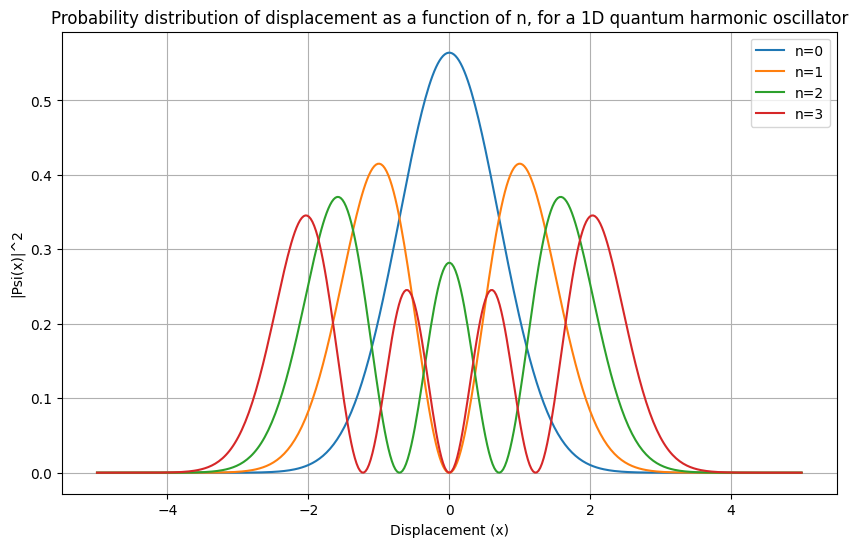

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

def calculate_wavefunction(n, x):
    '''Computing a wavefunction for a 1D quantum harmonic oscillator'''
    wavefunction = ((1 / (2**n * np.math.factorial(n)))**0.5 * (1/np.pi)**0.25) * np.exp(-x**2/2) * hermite(n)(x)
    return wavefunction


x = np.linspace(-5, 5, 400)


plt.figure(figsize=(10, 6))
for n in [0, 1, 2, 3]:
    plt.plot(x, abs(calculate_wavefunction(n, x))**2, label=f"n={n}")

plt.title('Probability distribution of displacement as a function of n, for a 1D quantum harmonic oscillator')
plt.xlabel('Displacement (x)')
plt.ylabel('|Psi(x)|^2')
plt.legend()
plt.grid(True)
plt.show()


To adress temperature dependence:\
Occupation of each energy level is given by the Boltzmann distribution:

$p_n \propto e^{-E_n/k_BT}$

$\Theta$ is the characteristic temperature. For a harmonic oscilator:

$\Theta_{\nu} = \frac{\hbar \omega}{k}$


/tmp/ipykernel_11945/849630359.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  wavefunction = ((1 / (2**n * np.math.factorial(n)))**0.5 * (1/np.pi)**0.25) * np.exp(-x**2/2) * hermite(n)(x)


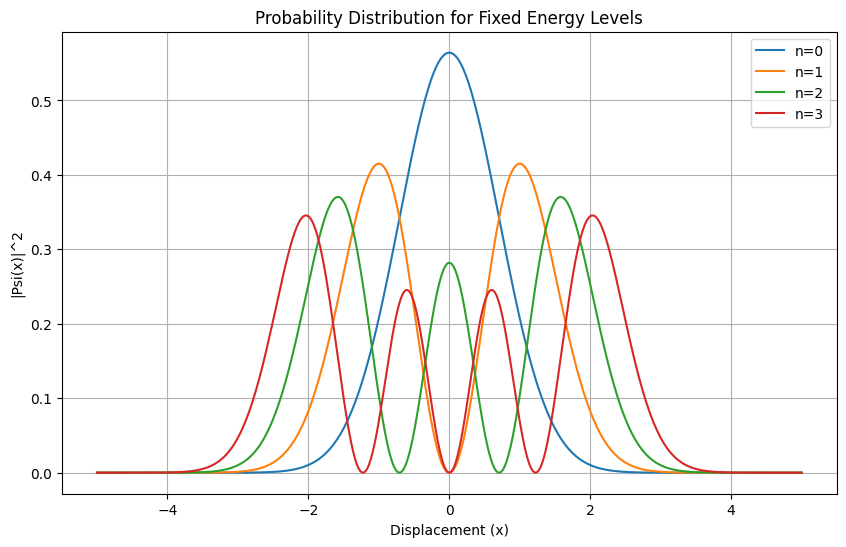

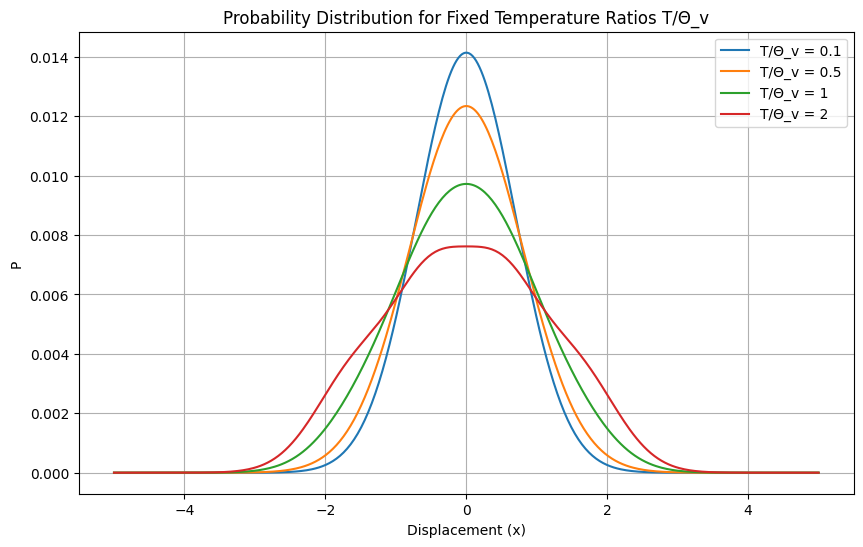

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

def calculate_wavefunction(n, x):
    '''Computing a wavefunction for a 1D quantum harmonic oscillator'''
    wavefunction = ((1 / (2**n * np.math.factorial(n)))**0.5 * (1/np.pi)**0.25) * np.exp(-x**2/2) * hermite(n)(x)
    return wavefunction

def boltzmann_distribution(n, temp_ratio):
    '''Computing boltzmann distribution of energy levels'''
    # T/Theta_v
    return np.exp(-(n + 0.5)/temp_ratio)

# Parameters
x = np.linspace(-5, 5, 400)

# 1. For fixed energy
plt.figure(figsize=(10, 6))
for n in [0, 1, 2, 3]:
    plt.plot(x, abs(calculate_wavefunction(n, x))**2, label=f"n={n}")

plt.title('Probability Distribution for Fixed Energy Levels')
plt.xlabel('Displacement (x)')
plt.ylabel('|Psi(x)|^2')
plt.legend()
plt.grid(True)
plt.show()

# 2. For fixed temperature
temp_ratios = [0.1, 0.5, 1, 2]

plt.figure(figsize=(10, 6))

for temp_ratio in temp_ratios:
    prob = np.zeros_like(x)
    for n in [0, 1, 2, 3]:  # considering first 5 energy levels
        weight = boltzmann_distribution(n, temp_ratio)
        prob += weight * abs(calculate_wavefunction(n, x))**2
    prob /= prob.sum()  # Normalization
    plt.plot(x, prob, label=f'T/Θ_v = {temp_ratio}')

plt.title('Probability Distribution for Fixed Temperature Ratios T/Θ_v')
plt.xlabel('Displacement (x)')
plt.ylabel('P')
plt.legend()
plt.grid(True)
plt.show()
